In [94]:
# "Seps-is?: A Diagnostic Tool for Infection using Vital Sign Data"
# MedHacks 2019, Track: Post-operative care
# Members: Srinidhi Emkay, Brandon Liu, Randy Maysaud, Emmanuel Osikpa, Jenny Tran
# This program predicts infection based on changes in heart rate (HR) and body temperature (BT).

# 0. Background information
# 1. Baselining of HR & BT
# 2. Measurement of HR & BT
# 3. Calculation of ΔHR/BT
# 4. Reporting of infection risk
# 5. Noting of other potential disease risks
# 6. Challenges, conclusions, & future work

import random # for random patient data generation
import matplotlib as plt # for data visualization
from matplotlib import pyplot


Text(0, 0.5, 'ΔHR')

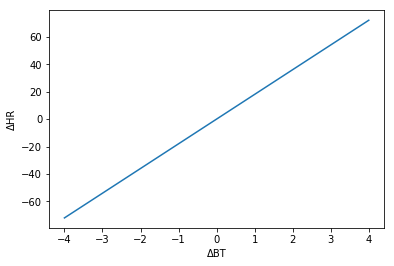

In [81]:
# 0. Background information

# Track: Post-operative care
# - Prediction of infection ... but what sensors do we have?
# - We thought: unachievable track? No access to microbial sensors
# - Detection of infection based on vital signs?

# Ref.: Hamano, J.; Tokuda, Y. Changes in vital signs as predictors of bacterial infection in home care: a multi-center prospective cohort study. Postgrad. Med. 2017, 129, 283-287.
# - Prediction of infection based on heart rate & body temperature changes
# - Use of heart rate & body temperature in tandem improved specificity drastically
# - Employed in geriatric care in long-term care facilities
# - Can we employ this diagnostic approach in post-operative care in homes?

# Project: Diagnostic tool for infection based on heart rate & body temperature changes
# - A potential at-home diagnostic tool for infection

# Normal ΔHR/BT = 18 bpm / °C
# Above line - infection likely
# Below line - infection unlikely
x = [-4, -3, -2, -1, 0, 1, 2, 3, 4]
y = [i * 18 for i in x]
plt.pyplot.plot(x,y)
plt.pyplot.xlabel("ΔBT")
plt.pyplot.ylabel("ΔHR")


In [36]:
# 1. Baselining of HR & BT
# Baseline could be determined by patient's previous healthy reports or assumed if unavailable
# Baseline can vary among patients

baselineMethod = input("Baseline method? (\"averaged\" or \"assumed\"): ")

if baselineMethod == "averaged":
    print("Please input data averaged of the past 3 healthy reports.")
    hrBaseline = int(input("Baseline HR:   "))
    btBaseline = float(input("Baseline BT: "))
elif baselineMethod == "assumed":
    hrBaseline = 60; print("Baseline HR: " + str(hrBaseline) + " bpm")
    btBaseline = 36.0; print("Baseline BT: " + str(round(btBaseline, 1)) + " °C")
else: print("Error in baseline method. Try again.")


Baseline method? ("averaged" or "assumed"): assumed
Baseline HR: 60 bpm
Baseline BT: 36.0 °C


In [93]:
# 2. Measurement of HR & BT
# In place of sensors, random data are generated based on possible ranges of HR & BT

print("Random patient data generated:")
hrReading = random.randrange(40, 120); print(" HR: " + str(hrReading) + " bpm")
btReading = round(0.1 * random.randrange(300, 420), 1); print(" BT: " + str(round(btReading, 1)) + " °C")
print()

# 3. Calculation of ΔHR/BT
# Basis of infection prediction is on this value

deltaHr = hrReading - hrBaseline; print("ΔHR: " + str(deltaHr) + " bpm")
deltaBt = btReading - btBaseline; print("ΔBT: " + str(round(deltaBt, 1)) + " °C")
if deltaBt == 0: deltaBt = 0.1 # Prevents division by 0
deltaHrBt = round(float(deltaHr)/deltaBt, 1); print("ΔHR/BT = " + str(deltaHrBt) + " bpm/°C")
print()

# 4. Report of infection risk
# Specificity - ability to identify patients without disease
# Specificity of predictive approaches:
# - This work    (ΔHR/BT > 20) : specificity = 84%
# - Trachycardia (HR > 100 bpm): specificity = 68%
# - - High bpm due to high temp is not infection
# - Fever        (BT > 37.8 °C): specificity = 49%
# - - High temp alone may not be due to infection

if deltaHrBt > 20: print("Infection likely. Seek medical attention.")
else: print("Infection unlikely.")
print()
    
# 5. Noting of other potential disease risks

print("Other disease risks: ")
if hrReading < 60:   print("Heart rate below normal range (60-100 bpm).")
if hrReading > 100:  print("Heart rate above normal range (60-100 bpm). Trachycardia likely.")
if btReading < 36.1: print("Body temperature below normal range (36.1-37.8 °C).")
if btReading > 37.8: print("Body temperature above normal range (36.1-37.8 °C). Fever likely.")
# Further predictions of diseases could be implemented here
    

Random patient data generated:
 HR: 111 bpm
 BT: 36.6 °C

ΔHR: 51 bpm
ΔBT: 0.6 °C
ΔHR/BT = 85.0 bpm/°C

Infection likely. Seek medical attention.

Other disease risks: 
Heart rate above normal range (60-100 bpm). Trachycardia likely.


In [ ]:
# 6. Challenges, conclusions, & future work

# Challenges
# - Research progress (only recent concept, 2017)
# - Factoring demographic data (ref. age avg. = 84 ± 10 years)
# - Generalizing data for demographics (age, race, ses, etc.)

# Conclusions
# - Developed tool for diagnostic prediction using very simple programming
# - Complex diseases may be predicted (not diagnosed) by simple measures
# - Research is difficult to employ live in a clinical setting
# - Correlations can be programmed into a microcomputer for ease of access
# - Encourages transition to programming for diagnostic aid

# Future Work
# - Addition of neural network layer for prediction improvement
# - Hardware implementation: sensors for HR, BT, other vitals
# - Expansion of vital signs and diseases to predict

# Thank you!